In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score, recall_score, f1_score

In [4]:
df=pd.read_csv("File_gender_classification_v7.csv")
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [ ]:
df.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [ ]:
encoder=LabelEncoder()
category=df.select_dtypes(include=["object","category"])
for x in category:
    df[x]=encoder.fit_transform(df[x])
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


In [ ]:
df.shape

(5001, 8)

In [ ]:
X=df.drop(["gender"],axis=1) #independent variables
y=df["gender"] # dependent variables


In [ ]:
X

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0
...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0
4997,1,11.9,5.4,0,0,0,0
4998,1,12.9,5.7,0,0,0,0
4999,1,13.2,6.2,0,0,0,0


In [ ]:
y

0       1
1       0
2       1
3       1
4       0
       ..
4996    0
4997    0
4998    0
4999    0
5000    1
Name: gender, Length: 5001, dtype: int32

# feuture engineering


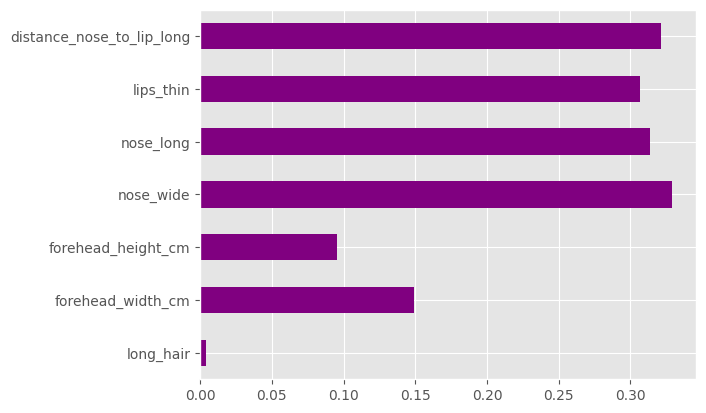

In [ ]:
from sklearn.feature_selection import mutual_info_classif
plt.style.use("ggplot")
importance=mutual_info_classif(X,y)
feature_impo=pd.Series(importance,X.columns[0:len(X.columns)])
feature_impo.plot(kind="barh",color="purple")
plt.show()

In [ ]:
X=df.drop(["long_hair"],axis=1,inplace=True)
X

,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,11.8,6.1,1,0,1,1,1
1,14.0,5.4,0,0,1,0,0
2,11.8,6.3,1,1,1,1,1
3,14.4,6.1,0,1,1,1,1
4,13.5,5.9,0,0,0,0,0
...,...,...,...,...,...,...,...
4996,13.6,5.1,0,0,0,0,0
4997,11.9,5.4,0,0,0,0,0
4998,12.9,5.7,0,0,0,0,0
4999,13.2,6.2,0,0,0,0,0


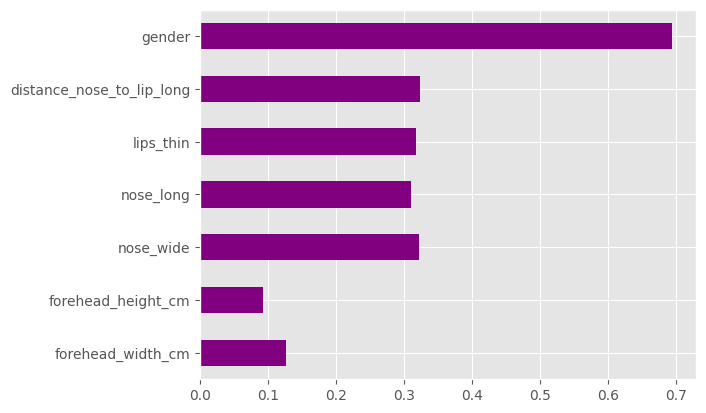

In [ ]:
from sklearn.feature_selection import mutual_info_classif
plt.style.use("ggplot")
importance=mutual_info_classif(X,y)
feature_impo=pd.Series(importance,X.columns[0:len(X.columns)])
feature_impo.plot(kind="barh",color="purple")
plt.show()

In [ ]:
## using model selection into train test split
## spliting the data set into training and testing set 
Xtrain, xtest,ytrain,ytest=train_test_split(X,y,test_size=0.20,random_state=1)
## 0.20 is 20 percent, 1.20 means 100 percent
## 20 percent for testing and 80 percent for training, training percent has to be bigger than testing percent

In [ ]:
classif=LogisticRegression(solver="newton-cg")
classif.fit(Xtrain,ytrain)

LogisticRegression(solver='newton-cg')

In [ ]:
pred1=classif.predict(xtest)
pred1

array([0, 1, 0, ..., 1, 1, 0])

In [ ]:
print(classification_report(ytest,pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       504
           1       1.00      1.00      1.00       497

    accuracy                           1.00      1001
   macro avg       1.00      1.00      1.00      1001
weighted avg       1.00      1.00      1.00      1001



<Axes: >

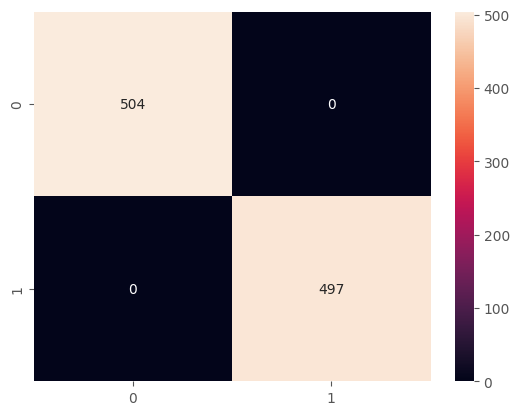

In [ ]:
cm=confusion_matrix(ytest,pred1)
sns.heatmap(cm,annot=True,fmt="0.9g")

In [ ]:
outcome={
    "Actual Class":ytest,
    "predicted Class":pred1
}
df1=pd.DataFrame(outcome)
df1.head()

,Actual Class,predicted Class
2764,0,0
4767,1,1
3814,0,0
3499,0,0
2735,0,0
